# MonetGen -Data Exploration

Let’s work through the implementation using PyTorch to generate Monet-style images for the Kaggle competition, focusing on a dataset of Monet paintings and another dataset of photos. We’ll follow these steps:

1. **Understanding the Dataset**: We’ll explore the dataset structure and understand its content.
2. **Creating PyTorch Datasets and DataLoaders**: We’ll create PyTorch datasets and data loaders, explaining their importance.
3. **Visualizing a Few Samples**: We’ll visualize some samples and explain the concept of unpaired images and the importance of CycleGAN.

## 1. Understanding the Dataset

In this task, we have two main datasets:

- **Monet Paintings**: A collection of images created by Claude Monet, representing the target style we aim to replicate.
- **Photos**: A set of regular photographs that we want to transform into the Monet painting style.

**Key Points**:
- **Unpaired Data**: The Monet paintings and photos do not have a direct correspondence (i.e., no paired data like a photo and its Monet-style counterpart).
- **Objective**: To learn a mapping from the domain of photos to the domain of Monet paintings using unpaired data.

In [1]:
import os
from PIL import Image
import torch
from torch.utils.data import Dataset, DataLoader
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

## 2. Creating PyTorch Datasets and DataLoaders

PyTorch datasets and data loaders are essential for efficiently handling and processing large datasets during training. They support batching, shuffling, and parallel data loading, which are crucial for training neural networks effectively.

### Creating the Dataset Class

We’ll define a custom dataset class for loading images from both domains (Monet paintings and photos) and applying necessary transformations like resizing and normalization.

In [2]:
# Dataset class
class ImageDataset(Dataset):
    def __init__(self, root_dir, transform=None):
        self.root_dir = root_dir
        self.transform = transform
        self.image_paths = [os.path.join(root_dir, img) for img in os.listdir(root_dir) if img.endswith('.jpg')]

    def __len__(self):
        return len(self.image_paths)

    def __getitem__(self, idx):
        img_path = self.image_paths[idx]
        image = Image.open(img_path)
        if self.transform:
            image = self.transform(image)
        return image

In [3]:
# Transformations
transform = transforms.Compose([
    transforms.Resize((256, 256)),
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

In [4]:
# Create datasets for Monet paintings and photos
monet_path = "/kaggle/input/gan-getting-started/monet_jpg"
photos_path = "/kaggle/input/gan-getting-started/photo_jpg"

monet_dataset = ImageDataset(root_dir=monet_path, transform=transform)
photo_dataset = ImageDataset(root_dir=photos_path, transform=transform)

#### Creating DataLoaders

Data loaders are used to handle batch loading, shuffling, and parallel data loading, which are important for efficient training.

**Importance of DataLoaders**:
- **Batching**: Processes multiple images in each iteration, speeding up training and helping with generalization.
- **Shuffling**: Ensures that the model doesn’t memorize the order of images, promoting better learning.
- **Parallel Loading**: Uses multiple CPU cores for data loading, reducing the time needed to load data and increasing training efficiency.

In [5]:
# Create data loaders
monet_loader = DataLoader(monet_dataset, batch_size=16, shuffle=True, num_workers=4)
photo_loader = DataLoader(photo_dataset, batch_size=16, shuffle=True, num_workers=4)

## 3. Visualizing a Few Samples and Explaining CycleGAN

### Visualizing a Few Samples

Visualizing samples helps us understand the dataset and verify that our data preprocessing steps are working correctly.

In [6]:
# Function to show images
def show_images(images, title=None):
    fig, ax = plt.subplots(1, len(images), figsize=(15, 5))
    if title:
        fig.suptitle(title, fontsize=16)
    for i, img in enumerate(images):
        img = img.permute(1, 2, 0)  # Convert from [C, H, W] to [H, W, C]
        img = img * 0.5 + 0.5  # Denormalize
        ax[i].imshow(img)
        ax[i].axis('off')
    plt.show()

In [7]:
# Get some images
monet_iter = iter(monet_loader)
photo_iter = iter(photo_loader)

monet_images = [next(monet_iter) for _ in range(4)]
photo_images = [next(photo_iter) for _ in range(4)]

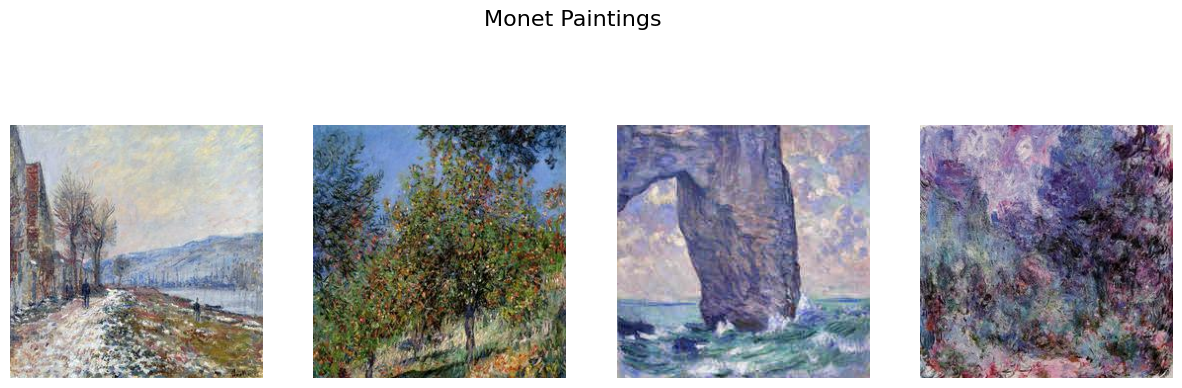

In [8]:
show_images([monet_images[i][0] for i in range(4)], title='Monet Paintings')

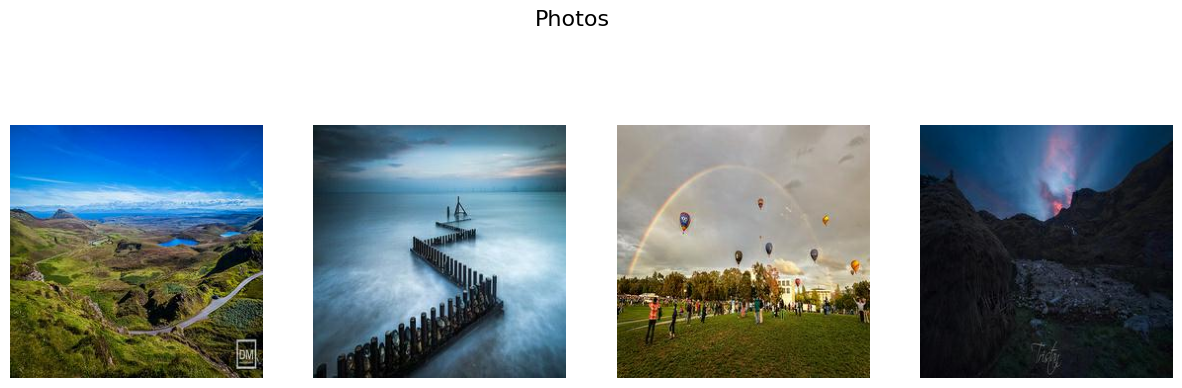

In [9]:
show_images([photo_images[i][0] for i in range(4)], title='Photos')

This implementation provides a thorough approach to loading, processing, and visualizing your datasets, laying a strong foundation for developing and training a CycleGAN to translate photos into Monet-style paintings.

#### Explanation of Unpaired Images and CycleGAN

**Unpaired Images**:
- In many real-world scenarios, we don’t have direct pairs of images from two different domains. For example, we don’t have a direct photograph and its corresponding Monet-style painting.
- Unpaired datasets consist of two separate sets of images (e.g., Monet paintings and photos) without direct correspondences between them.

**Importance of CycleGAN**:
- **Bidirectional Mapping**: CycleGAN maps images from the domain of photos to the domain of Monet paintings and vice versa. This ensures the generated images look realistic and retain the structural integrity of the original photos.
- **Cycle Consistency**: The cycle consistency loss in CycleGAN ensures that an image can be translated to another domain and back to its original form, preserving essential content and structure.
- **Style Transfer**: CycleGAN is designed to learn the artistic style of one set of images (Monet paintings) and apply it to another set (photos), making it ideal for tasks like creating Monet-style images from regular photos.

By visualizing the samples, we can appreciate the diversity in the datasets and understand the challenge of translating between two distinct image domains. This visualization also ensures our data loaders and preprocessing steps are functioning correctly, setting the stage for developing and training a CycleGAN.